In [192]:
import numpy as np
import pandas as pd

In [193]:
import pandas as pd
#reading the CSV file
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [194]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [195]:
df.shape

(5572, 5)

## 1. Data Cleaning

In [196]:
#printing the concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [197]:
#column 2, 3, 4 have majority missing values, so it is better to drop them.
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [198]:
df.sample(5)

,v1,v2
1655,ham,At 7 we will go ok na.
36,ham,"Oops, I'll let you know when my roommate's done"
4950,ham,hi baby im sat on the bloody bus at the mo and...
5158,ham,I will come with karnan car. Please wait till ...
5161,ham,Lol no. I just need to cash in my nitros. Hurr...


In [199]:
#renaming the column names to a better and meaningful column name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1155,ham,"Sorry man, accidentally left my phone on silen..."
1040,ham,Today am going to college so am not able to at...
2919,ham,"Thanx 4 the time weåÕve spent 2geva, its bin m..."
5008,ham,My mobile number.pls sms ur mail id.convey reg...
3917,ham,No need to ke qi... ÌÏ too bored izzit y sudde...


In [200]:
#result has categorical labels, we need to convert it into numerical values - enbcoding
#for that we will be using 'LabelEncoder' from sklearn

In [201]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [202]:
df['target'] = encoder.fit_transform(df['target'])

In [203]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [204]:
#so 0 means no SPAM (Ham), 1 means SPAM

In [205]:
# Check if there is any NULL value
df.isnull().sum()

target    0
text      0
dtype: int64

In [206]:
#the dataset has NO null values, so don't need to handle them

In [207]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [208]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [209]:
df.duplicated().sum()

np.int64(0)

In [210]:
df.shape

(5169, 2)

## 2. EDA

In [211]:
#The given problem is a classification problem, so we need to understand the data first by performing EDA.

In [212]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [213]:
#checking the number of SPAM vs not SPAM messages
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [214]:
#for better representation, we can use PIE CHART to represent it.
#PIE CHARTS can be created using matplotlib library

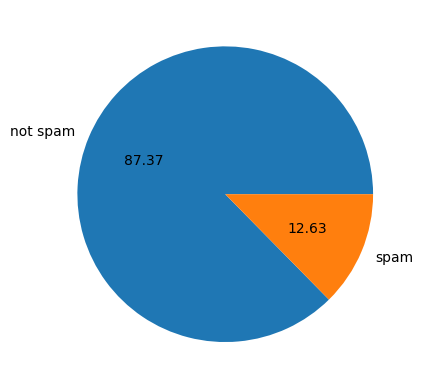

In [215]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['not spam','spam'],autopct="%0.2f")
plt.show()

In [216]:
# Data is Highly Imbalanced 
#now we will be analysing the number of alphabets/words/sentences being used in the TEXT
#for this, will create 3 new columns: (1) no. of characters (2) no. of words (3) no. of sentences in SMS

#using 'nltk' library for this. 
#Natural Language Toolkit for text processing 
#(pip install nltk)

In [217]:
import nltk

In [218]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [219]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [220]:
#analyzing the number of characters in text
df['num_characters'] = df['text'].apply(len)

In [221]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [222]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [223]:
# analyzing the number of words in text
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [224]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [225]:
#analyzing the number of sentences in text
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [226]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [227]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [228]:
# for ham mssg
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [229]:
print(df[['num_characters', 'num_words', 'num_sentences']].describe())

       num_characters    num_words  num_sentences
count     5169.000000  5169.000000    5169.000000
mean        78.977945    18.455794       1.965564
std         58.236293    13.324758       1.448541
min          2.000000     1.000000       1.000000
25%         36.000000     9.000000       1.000000
50%         60.000000    15.000000       1.000000
75%        117.000000    26.000000       2.000000
max        910.000000   220.000000      38.000000


In [230]:
# for spam mssg
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [231]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

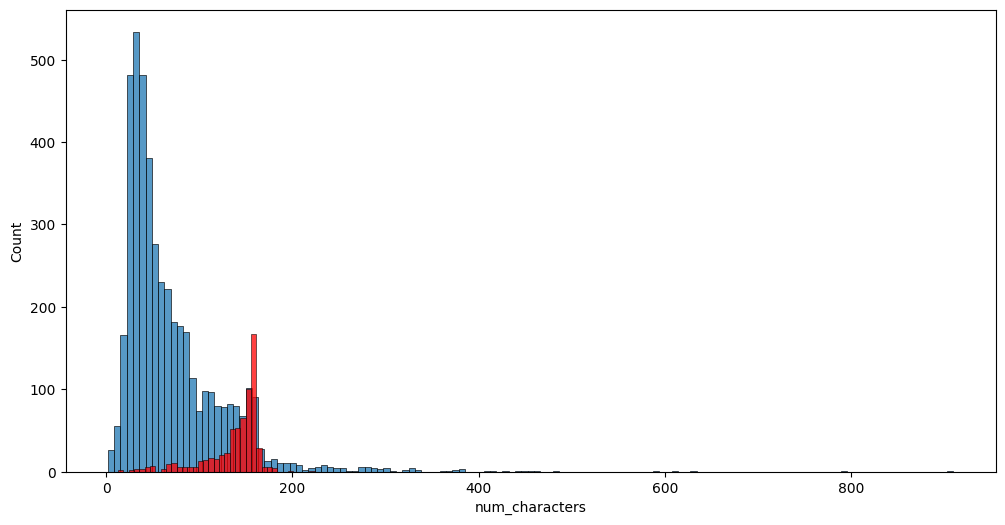

In [232]:
#ploting the histogram for number of character for ham and spam mssgs
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

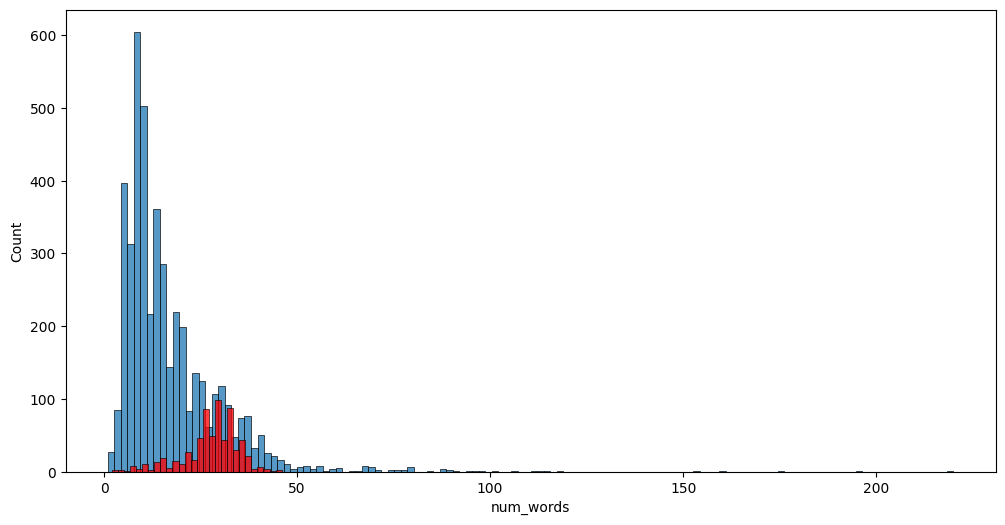

In [233]:
#ploting the histogram for number of words for ham and spam mssgs
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

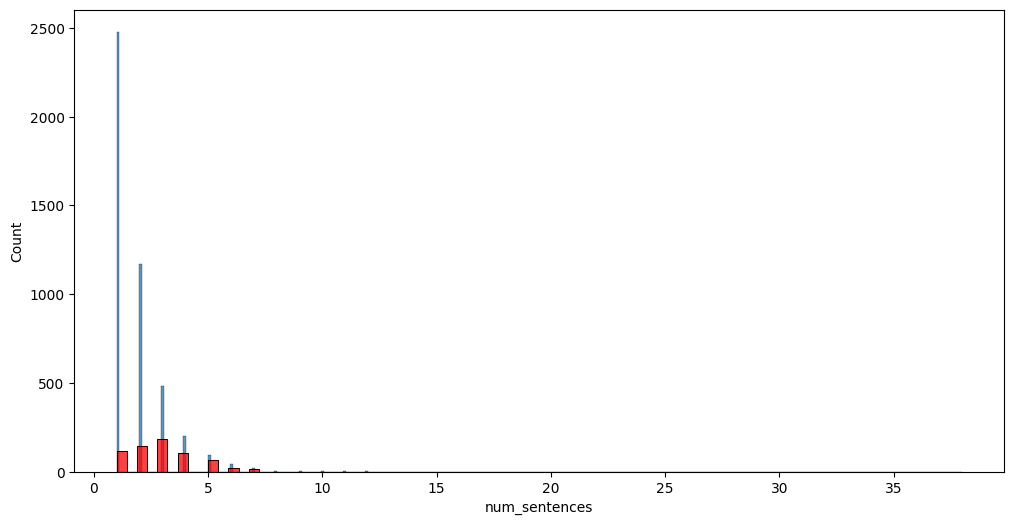

In [234]:
#ploting the histogram for number of sentences for ham and spam mssgs
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

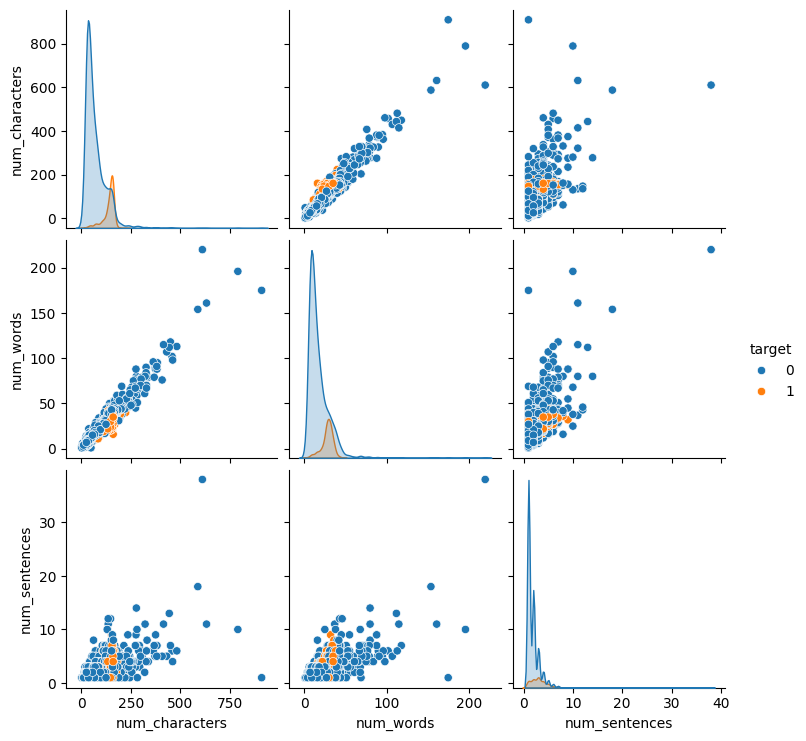

In [235]:
sns.pairplot(df,hue='target')

In [236]:
print(df.dtypes)

target             int64
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object


In [237]:
numeric_df = df.select_dtypes(include=['number'])

## 3. Data Preprocessing


In [238]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [239]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [240]:
# These all are the stopwords

In [241]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [242]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    
    text = stemmed[:]
    
    return " ".join(text)

In [243]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [244]:
#will create a new column to store the transformed text -> 'transform_text'
df['transformed_text'] = df['text'].apply(transform_text)

In [245]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [246]:
#will be creating word cloud for data visualization to display the most frequently occurring words in the processed dataset.
#using 'WordCloud' class

In [247]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [248]:
#creating a wordcloud for the SPAM messages
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

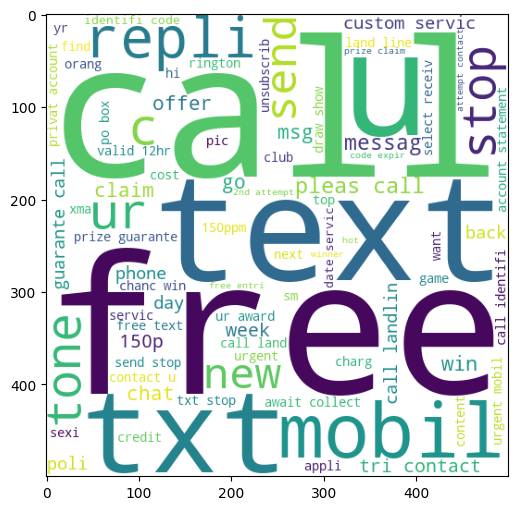

In [249]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [250]:
#creating a wordcloud for the HAM messages
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

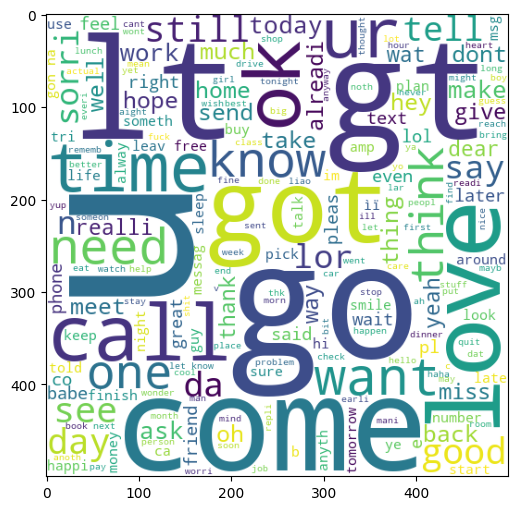

In [251]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [252]:
#extracting the most common words used in both SPAM and not SPAM messages

In [253]:
#extracting all the words used in SPAM messages
spamwords = list()
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spamwords.append(word)


In [254]:
len(spam_corpus)

9939

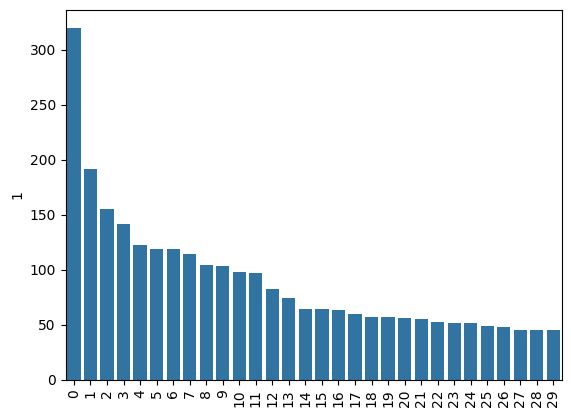

In [255]:
#plotting a bar plot of the mostCommonSPAM dataframe
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building


In [292]:
#NaiveBayes classifier works BEST on textual data, so will firstly perform it on the dataset.

In [257]:
#we need to give numerical inputs to the classifier model, so will have to convert the 'transformed_text' column into vectors.
#using 'bag of words'

In [258]:
#converting the collection of text into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [259]:
#transforming the data of processed column
X = cv.fit_transform(df['transformed_text']).toarray()

#printing size of X
X.shape

(5169, 6708)

In [260]:
#storing the values of the 'target' column
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [261]:
#splitting the training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [262]:
#creating the objects for the models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [263]:
#training the dataset for GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8617021276595744
[[774 125]
 [ 18 117]]
0.4834710743801653


In [264]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9700193423597679
[[882  17]
 [ 14 121]]
0.8768115942028986


In [265]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [266]:
#we have to focus mainly on 'precision' value
#the max precision we got is 9.45 with 9.64 as accuracy

In [267]:

#using 'TfidfVectorizer' for vectorization 
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(df['transformed_text']).toarray()

#storing the values of the 'target' column
y = df['target'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)


In [268]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8597678916827853
[[775 124]
 [ 21 114]]
0.4789915966386555


In [269]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9574468085106383
[[899   0]
 [ 44  91]]
1.0


In [270]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9642166344294004
[[893   6]
 [ 31 104]]
0.9454545454545454


In [271]:
#as data is IMBALANCED, precision score matters more than accuracy.
#using TfidfVectorizer method, we get precision score = 1 for MultinomialNB
#so we will use this only

In [272]:
#trying out different CLASSIFIER model for the BEST predictions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [273]:
#creating objects of the classifier models
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [274]:
#creating a dictionary that maps short names to the corresponding classification models.
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [275]:
#creating a function which uses train test split data and performing on model and returning the scores
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [276]:
#taking each classifier algorithm, training and testing data, storing the score values and then printing for each
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    #calling the previously defined function
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.960348162475822
Precision -  0.9519230769230769
For  KN
Accuracy -  0.8974854932301741
Precision -  1.0
For  NB
Accuracy -  0.9574468085106383
Precision -  1.0
For  DT
Accuracy -  0.941972920696325
Precision -  0.831858407079646
For  LR
Accuracy -  0.9458413926499033
Precision -  0.9072164948453608
For  RF
Accuracy -  0.9642166344294004
Precision -  1.0
For  AdaBoost
Accuracy -  0.9129593810444874
Precision -  0.7472527472527473
For  BgC
Accuracy -  0.960348162475822
Precision -  0.873015873015873
For  ETC
Accuracy -  0.971953578336557
Precision -  1.0
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9191919191919192


In [277]:
#converting the accuracy and precision score values to a dataframe
#sorting on the basis of precision value
performance = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance

,Algorithm,Accuracy,Precision
1,KN,0.897485,1.000000
2,NB,0.957447,1.000000
8,ETC,0.971954,1.000000
5,RF,0.964217,1.000000
0,SVC,0.960348,0.951923
9,GBDT,0.949710,0.919192
4,LR,0.945841,0.907216
7,BgC,0.960348,0.873016
3,DT,0.941973,0.831858
6,AdaBoost,0.912959,0.747253


In [278]:
#precision is 1, we need to maximize the accuracy score.
#try using the Voting classifier

In [279]:
#Voting classifier of NB, RF and ETC

#creating the objects for the classifier classes
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [280]:
#creating voting object
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('rf', rfc), ('nb', mnb), ('et', etc)],voting='soft')

In [281]:
#training the data
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [282]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9661508704061895
Precision 1.0


In [283]:
#precision is still 1 but accuracy dropped down.

In [284]:
#let's try STACKING

In [285]:
#Stacking of NB, RF and ETC
estimators=[('rf', rfc), ('nb', mnb), ('et', etc)]

#most weightage to ETC
final_estimator=ExtraTreesClassifier()


In [286]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [287]:
#training the dataset
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

#printing the scores
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.976


In [288]:
#precision dropped so can't consider it.

In [289]:
#finally, ETC is giving the best results, so we will be using the ETC classifier.

In [290]:
#model is PREPARED.
#now we have to host the website, for that pipeling needs to be done
#the text which we will get, has to be transformed first, then vectorized and then apply the algorithm

In [291]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))